In [6]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [7]:
df=pd.read_csv("Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.shape

(891, 12)

In [9]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [10]:
100*df.isna().mean()

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [11]:
survival_count=df["Survived"].value_counts()
survival_rate=100*survival_count/df.shape[0]
survival_data=pd.concat([survival_count,survival_rate],axis=1).reset_index()
survival_data.columns=['Survived','Count','Percentage']
survival_data


,Survived,Count,Percentage
0,0,549,61.616162
1,1,342,38.383838


C:\Users\91939\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


Text(0.5, 1.0, 'Percentage Survival of the Titanic Passengers')

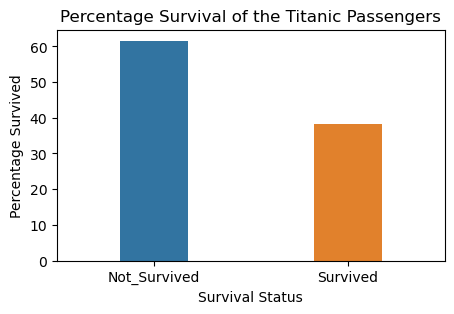

In [12]:
plt.figure(figsize=(5,3))
sns.barplot(survival_data,x=['Not_Survived','Survived'],y='Percentage',width=0.35)
plt.ylabel('Percentage Survived')
plt.xlabel('Survival Status')
plt.title('Percentage Survival of the Titanic Passengers')

In [15]:
def survival_acc_to_grp(df, colname):
    plt.figure(figsize=(5,3))
    survival_by_pclass=df[['Survived',colname]].value_counts().reset_index()
    sns.barplot(survival_by_pclass,x=colname,y='count',hue='Survived')
    plt.ylabel('Number of Survived')
    plt.title(f'Survival According to {colname}')
    

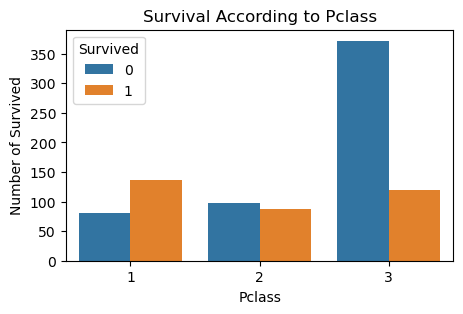

In [16]:
survival_acc_to_grp(df,'Pclass')

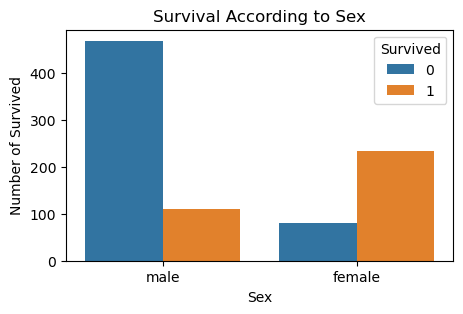

In [17]:
survival_acc_to_grp(df,'Sex')

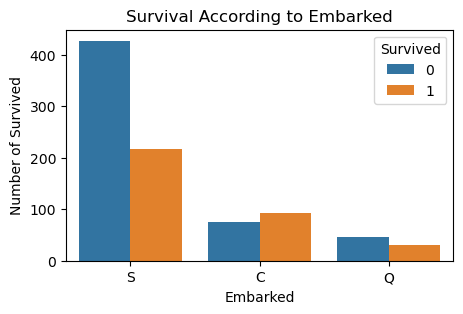

In [18]:
survival_acc_to_grp(df,'Embarked')

In [22]:
def vars_acc_to_surv(df,colname):
    plt.figure(figsize=(5,3))
    sns.kdeplot(df,x=colname,hue='Survived')
    plt.title(f'{colname} distribution accordingnto the survived')

C:\Users\91939\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\91939\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


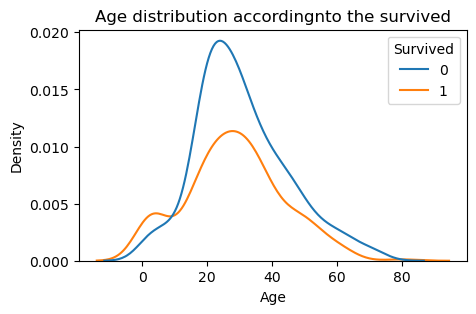

In [23]:
vars_acc_to_surv(df, 'Age')

C:\Users\91939\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\91939\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


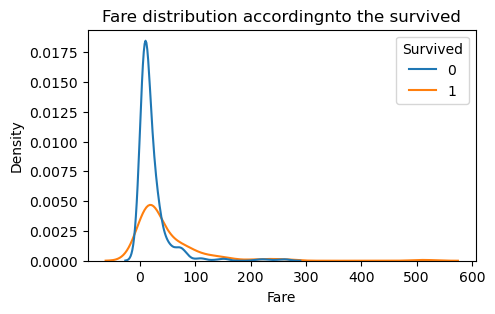

In [24]:
vars_acc_to_surv(df, 'Fare')

In [33]:
def count_acc_to_surv(df, colname):
    plt.figure(figsize=(5,3))
    df1=df.groupby(['SibSp', 'Survived']).count()['PassengerId'].reset_index()
    sns.barplot(df1,x='SibSp', y='PassengerId', hue='Survived')
    plt.title(f'{colname} according to survival')
    plt.xlabel(f'{colname}')
    plt.ylabel('count')

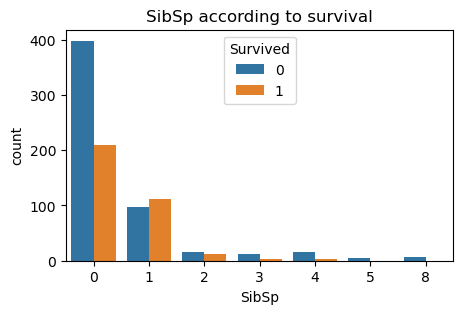

In [34]:
count_acc_to_surv(df, 'SibSp')

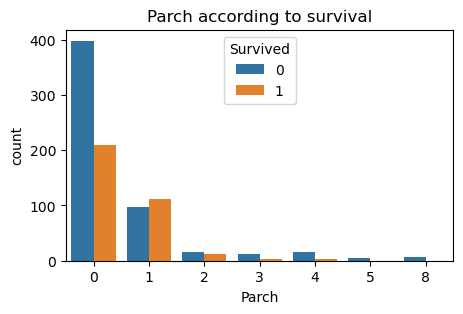

In [35]:
count_acc_to_surv(df, 'Parch')

Text(0.5, 1.0, 'Comparison of the continuous variables')

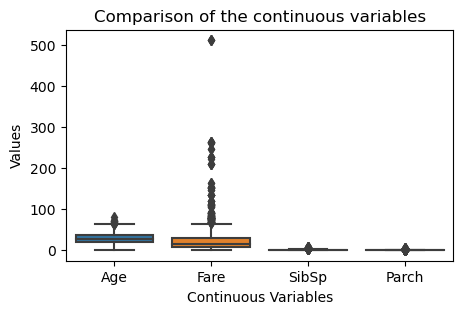

In [37]:
cont_vars=pd.melt(df, value_vars=['Age','Fare','SibSp','Parch'])
plt.figure(figsize=(5,3))
sns.boxplot(count_vars,x='variable',y='value')
plt.xlabel('Continuous Variables')
plt.ylabel('Values')
plt.title('Comparison of the continuous variables')

In [38]:
df= df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [39]:
df=df.dropna(subset='Fare')

In [40]:
df['Age']=df['Age'].fillna(df['Age'].median())

In [41]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [42]:
df_survived=df[df['Survived']==1]
df_not_survived=df[df['Survived']==0]

df_survived_resampled=df_survived.sample(n=df_not_survived.shape[0],replace=True,random_state=101)
df_balanced=pd.concat([df_not_survived,df_survived_resampled]).sample(frac=1,random_state=26)
df_balanced

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
849,1,1,female,28.0,1,0,89.1042,C
735,0,3,male,28.5,0,0,16.1000,S
857,1,1,male,51.0,0,0,26.5500,S
336,0,1,male,29.0,1,0,66.6000,S
272,1,2,female,41.0,0,1,19.5000,S
...,...,...,...,...,...,...,...,...
354,0,3,male,28.0,0,0,7.2250,C
21,1,2,male,34.0,0,0,13.0000,S
430,1,1,male,28.0,0,0,26.5500,S
244,0,3,male,30.0,0,0,7.2250,C


In [43]:
df_balanced['Survived'].value_counts()

Survived
1    549
0    549
Name: count, dtype: int64

In [46]:
X=df_balanced.drop(['Survived'],axis=1)
y=df_balanced['Survived']

In [47]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1055)

print(f'''
X_train:{X_train.shape}
X_test:{X_test.shape}
y_train:{y_train.shape}
y_test:{y_test.shape}''')


X_train:(878, 7)
X_test:(220, 7)
y_train:(878,)
y_test:(220,)


In [49]:
cont_cols=['Age','Fare']
disc_cols=['SibSp','Parch']
cat_cols=['Pclass', 'Sex', 'Embarked']

continuous_transformer=Pipeline(steps=[('scaler',StandardScaler())])
discrete_transformer=Pipeline(steps=[('scaler',MinMaxScaler())])
categorical_transformer=Pipeline(steps=[('onehot',OneHotEncoder(drop='first'))])
preprocessor=ColumnTransformer(transformers=[
    ('cont',continuous_transformer,cont_cols),
    ('disc',discrete_transformer,disc_cols),
    ('cat',categorical_transformer,cat_cols)
])
model=Pipeline(steps=[('preprocessor', preprocessor),
                     ('classifier',LogisticRegression())])

model.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cont',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare']),
                                                 ('disc',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['SibSp', 'Parch']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['Pclass', 'Sex',
                                                   'Embarked'])])),
                ('classifier', LogisticRegression())])

In [50]:
y_pred=model.predict(X_test)
y_pred

array([1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0],
      dtype=int64)

In [52]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.67      0.87      0.76        93
           1       0.88      0.69      0.77       127

    accuracy                           0.76       220
   macro avg       0.77      0.78      0.76       220
weighted avg       0.79      0.76      0.76       220



Text(33.22222222222222, 0.5, 'Predicted value')

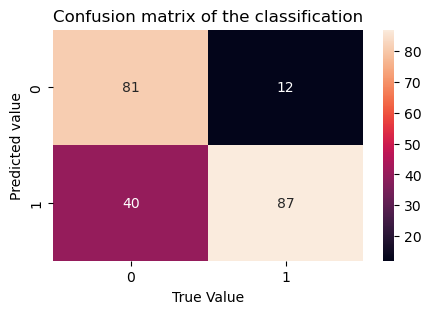

In [53]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(5,3))
sns.heatmap(cm,annot=True)
plt.title('Confusion matrix of the classification')
plt.xlabel('True Value')
plt.ylabel('Predicted value')

In [58]:
with open('./model_logistic.pkl','wb') as fp:
    pickle.dump(model,fp)

In [68]:
import pickle

# Load the saved model
with open('./model_logistic.pkl', 'rb') as fp:
    model = pickle.load(fp)

# Assuming X_all represents your entire dataset
predictions = model.predict(df)

# Count the occurrences of each prediction label
survived_count = sum(predictions)
not_survived_count = len(predictions) - survived_count

print("Number of passengers predicted to have survived:", survived_count)
print("Number of passengers predicted to have not survived:", not_survived_count)


Number of passengers predicted to have survived: 344
Number of passengers predicted to have not survived: 547


In [69]:
import pickle

# Load the saved model
with open('./model_logistic.pkl', 'rb') as fp:
    model = pickle.load(fp)

# Assuming X_all represents your entire dataset
predictions = model.predict(df)

# Convert predictions to human-readable labels
survival_labels = ["Not Survived" if pred == 0 else "Survived" for pred in predictions]

# Print the survival status for each passenger
for i, label in enumerate(survival_labels):
    print(f"Passenger {i+1}: {label}")


Passenger 1: Not Survived
Passenger 2: Survived
Passenger 3: Survived
Passenger 4: Survived
Passenger 5: Not Survived
Passenger 6: Not Survived
Passenger 7: Not Survived
Passenger 8: Not Survived
Passenger 9: Survived
Passenger 10: Survived
Passenger 11: Survived
Passenger 12: Survived
Passenger 13: Not Survived
Passenger 14: Not Survived
Passenger 15: Survived
Passenger 16: Survived
Passenger 17: Not Survived
Passenger 18: Not Survived
Passenger 19: Survived
Passenger 20: Survived
Passenger 21: Not Survived
Passenger 22: Not Survived
Passenger 23: Survived
Passenger 24: Not Survived
Passenger 25: Survived
Passenger 26: Not Survived
Passenger 27: Not Survived
Passenger 28: Survived
Passenger 29: Survived
Passenger 30: Not Survived
Passenger 31: Survived
Passenger 32: Survived
Passenger 33: Survived
Passenger 34: Not Survived
Passenger 35: Survived
Passenger 36: Not Survived
Passenger 37: Not Survived
Passenger 38: Not Survived
Passenger 39: Survived
Passenger 40: Survived
Passenger 41: